In [1]:
from sklearn.datasets import fetch_20newsgroups
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.naive_bayes import MultinomialNB

In [4]:
import nltk 
nltk.download('stopwords')
newsgroups = fetch_20newsgroups()
stops = set(stopwords.words("english"))

punctuations = list(string.punctuation)
stops.update(punctuations)

newsgroups.keys()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Samar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [5]:
more_stops=np.loadtxt("datasets/stops.txt", dtype=str, delimiter=" ")
stops.update(more_stops)
len(stops)

FileNotFoundError: datasets/stops.txt not found.

In [6]:
len(newsgroups.data)

11314

In [7]:
import nltk 
nltk.download('punkt')
all_documents = newsgroups.data
all_categories = newsgroups.target
all_documents_modified = [word_tokenize(doc) for doc in all_documents]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Samar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
x_train,x_test,y_train,y_test = train_test_split(all_documents_modified, all_categories, random_state=1)

In [9]:
all_words = []

for doc in x_train:
    for word in doc:
        if(word.lower() not in stops) and len(word)!=1 and len(word)!=2 and word[0]!="'" and word!= "n't" and word[0]!='.':
            all_words.append(word)

In [10]:
def freq_dict(all_words):
    dic=dict()
    #it iterates through all the elements in the list and increases the frequency by one if it encounters the same element again.
    for word in all_words:
        if word in dic.keys():
            dic[word]+=1
        else:
            dic[word]=1
    return dic

dic=freq_dict(all_words)

In [11]:
import numpy as np
freq=np.array([i for i in dic.values()])
words=np.array([i for i in dic.keys()])

In [12]:
words=words[np.argsort(freq)][::-1]
freq=np.sort(freq)[::-1]

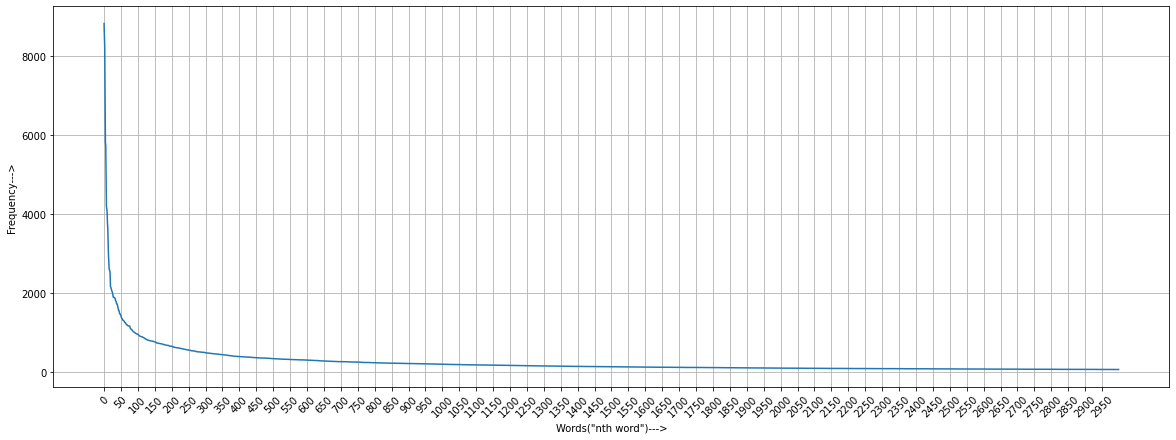

In [13]:
import matplotlib.pyplot as plt

lower_limit=0    
upper_limit=3000    
difference_between_each_xtick=50  

plt.figure(figsize=(20, 7))
plt.plot(np.arange(len(freq))[lower_limit:upper_limit], freq[lower_limit:upper_limit])
plt.xlabel('Words("nth word")--->')
plt.ylabel("Frequency--->")
plt.xticks(np.arange(lower_limit, upper_limit, 50), rotation=45)
plt.grid()
plt.show()

In [14]:
features=words[20:100000] 
freq[20], freq[10000]

(2150, 18)

In [15]:
def data_modifier(x_data,feature):
    modified_data=np.zeros((len(x_data), len(features)))
    
    count =0
    max_count = len(x_data)
    for i in range(len(x_data)):
        current_doc = x_data[i]
        d = dict()
        for word in current_doc:
            if word in d.keys():
                d[word]+=1
            else:
                d[word]=1
        
        for j in range(len(features)):
            if features[j] in d.keys():
                modified_data[i][j] = d[features[j]]
            else:
                continue
        count+=1
        print("progress: ", (count*100)/max_count, "%")
        
    return modified_data

In [ ]:
x_train_modified = data_modifier(x_train, features)

progress:  0.011785503830288745 %
progress:  0.02357100766057749 %
progress:  0.03535651149086624 %
progress:  0.04714201532115498 %
progress:  0.05892751915144372 %
progress:  0.07071302298173247 %
progress:  0.08249852681202122 %
progress:  0.09428403064230996 %
progress:  0.1060695344725987 %
progress:  0.11785503830288745 %
progress:  0.1296405421331762 %
progress:  0.14142604596346495 %
progress:  0.15321154979375368 %
progress:  0.16499705362404243 %
progress:  0.17678255745433116 %
progress:  0.18856806128461992 %
progress:  0.20035356511490865 %
progress:  0.2121390689451974 %
progress:  0.22392457277548616 %
progress:  0.2357100766057749 %
progress:  0.24749558043606365 %
progress:  0.2592810842663524 %
progress:  0.27106658809664114 %
progress:  0.2828520919269299 %
progress:  0.2946375957572186 %
progress:  0.30642309958750735 %
progress:  0.3182086034177961 %
progress:  0.32999410724808487 %
progress:  0.3417796110783736 %
progress:  0.3535651149086623 %
progress:  0.365350

progress:  3.052445492044785 %
progress:  3.0642309958750737 %
progress:  3.0760164997053625 %
progress:  3.0878020035356513 %
progress:  3.09958750736594 %
progress:  3.1113730111962288 %
progress:  3.1231585150265175 %
progress:  3.1349440188568063 %
progress:  3.146729522687095 %
progress:  3.158515026517384 %
progress:  3.1703005303476726 %
progress:  3.1820860341779613 %
progress:  3.1938715380082496 %
progress:  3.2056570418385384 %
progress:  3.217442545668827 %
progress:  3.229228049499116 %
progress:  3.2410135533294047 %
progress:  3.2527990571596934 %
progress:  3.264584560989982 %
progress:  3.276370064820271 %
progress:  3.2881555686505597 %
progress:  3.2999410724808484 %
progress:  3.311726576311137 %
progress:  3.323512080141426 %
progress:  3.3352975839717147 %
progress:  3.3470830878020035 %
progress:  3.3588685916322922 %
progress:  3.370654095462581 %
progress:  3.3824395992928697 %
progress:  3.3942251031231585 %
progress:  3.4060106069534473 %
progress:  3.4177961

progress:  6.187389510901591 %
progress:  6.19917501473188 %
progress:  6.210960518562168 %
progress:  6.2227460223924576 %
progress:  6.234531526222746 %
progress:  6.246317030053035 %
progress:  6.258102533883323 %
progress:  6.269888037713613 %
progress:  6.281673541543901 %
progress:  6.29345904537419 %
progress:  6.305244549204478 %
progress:  6.317030053034768 %
progress:  6.328815556865056 %
progress:  6.340601060695345 %
progress:  6.352386564525633 %
progress:  6.364172068355923 %
progress:  6.375957572186211 %
progress:  6.387743076016499 %
progress:  6.3995285798467885 %
progress:  6.411314083677077 %
progress:  6.423099587507366 %
progress:  6.434885091337654 %
progress:  6.4466705951679435 %
progress:  6.458456098998232 %
progress:  6.470241602828521 %
progress:  6.482027106658809 %
progress:  6.4938126104890985 %
progress:  6.505598114319387 %
progress:  6.517383618149676 %
progress:  6.529169121979964 %
progress:  6.5409546258102536 %
progress:  6.552740129640542 %
progr

progress:  9.310548025928108 %
progress:  9.322333529758398 %
progress:  9.334119033588687 %
progress:  9.345904537418974 %
progress:  9.357690041249263 %
progress:  9.369475545079553 %
progress:  9.38126104890984 %
progress:  9.39304655274013 %
progress:  9.404832056570418 %
progress:  9.416617560400708 %
progress:  9.428403064230995 %
progress:  9.440188568061284 %
progress:  9.451974071891573 %
progress:  9.463759575721863 %
progress:  9.47554507955215 %
progress:  9.48733058338244 %
progress:  9.499116087212728 %
progress:  9.510901591043018 %
progress:  9.522687094873305 %
progress:  9.534472598703594 %
progress:  9.546258102533884 %
progress:  9.558043606364173 %
progress:  9.56982911019446 %
progress:  9.58161461402475 %
progress:  9.593400117855039 %
progress:  9.605185621685328 %
progress:  9.616971125515615 %
progress:  9.628756629345904 %
progress:  9.640542133176194 %
progress:  9.652327637006483 %
progress:  9.66411314083677 %
progress:  9.67589864466706 %
progress:  9.687

progress:  12.39835002946376 %
progress:  12.410135533294048 %
progress:  12.421921037124337 %
progress:  12.433706540954626 %
progress:  12.445492044784915 %
progress:  12.457277548615203 %
progress:  12.469063052445492 %
progress:  12.480848556275781 %
progress:  12.49263406010607 %
progress:  12.504419563936358 %
progress:  12.516205067766647 %
progress:  12.527990571596936 %
progress:  12.539776075427225 %
progress:  12.551561579257513 %
progress:  12.563347083087802 %
progress:  12.575132586918091 %
progress:  12.58691809074838 %
progress:  12.598703594578668 %
progress:  12.610489098408957 %
progress:  12.622274602239246 %
progress:  12.634060106069535 %
progress:  12.645845609899823 %
progress:  12.657631113730112 %
progress:  12.669416617560401 %
progress:  12.68120212139069 %
progress:  12.692987625220978 %
progress:  12.704773129051267 %
progress:  12.716558632881556 %
progress:  12.728344136711845 %
progress:  12.740129640542133 %
progress:  12.751915144372422 %
progress:  1

progress:  15.450795521508544 %
progress:  15.462581025338833 %
progress:  15.474366529169123 %
progress:  15.48615203299941 %
progress:  15.4979375368297 %
progress:  15.509723040659988 %
progress:  15.521508544490278 %
progress:  15.533294048320565 %
progress:  15.545079552150854 %
progress:  15.556865055981143 %
progress:  15.568650559811433 %
progress:  15.58043606364172 %
progress:  15.59222156747201 %
progress:  15.604007071302298 %
progress:  15.615792575132588 %
progress:  15.627578078962875 %
progress:  15.639363582793164 %
progress:  15.651149086623453 %
progress:  15.662934590453743 %
progress:  15.67472009428403 %
progress:  15.68650559811432 %
progress:  15.698291101944609 %
progress:  15.710076605774898 %
progress:  15.721862109605185 %
progress:  15.733647613435474 %
progress:  15.745433117265764 %
progress:  15.757218621096051 %
progress:  15.76900412492634 %
progress:  15.78078962875663 %
progress:  15.792575132586919 %
progress:  15.804360636417206 %
progress:  15.816

progress:  18.526812021213907 %
progress:  18.538597525044196 %
progress:  18.550383028874485 %
progress:  18.562168532704774 %
progress:  18.573954036535063 %
progress:  18.58573954036535 %
progress:  18.59752504419564 %
progress:  18.609310548025928 %
progress:  18.621096051856217 %
progress:  18.632881555686506 %
progress:  18.644667059516795 %
progress:  18.656452563347084 %
progress:  18.668238067177374 %
progress:  18.68002357100766 %
progress:  18.69180907483795 %
progress:  18.703594578668238 %
progress:  18.715380082498527 %
progress:  18.727165586328816 %
progress:  18.738951090159105 %
progress:  18.750736593989394 %
progress:  18.76252209781968 %
progress:  18.77430760164997 %
progress:  18.78609310548026 %
progress:  18.797878609310548 %
progress:  18.809664113140837 %
progress:  18.821449616971126 %
progress:  18.833235120801415 %
progress:  18.845020624631704 %
progress:  18.85680612846199 %
progress:  18.86859163229228 %
progress:  18.88037713612257 %
progress:  18.8921

progress:  21.614614024749557 %
progress:  21.626399528579846 %
progress:  21.638185032410135 %
progress:  21.649970536240424 %
progress:  21.661756040070713 %
progress:  21.673541543901003 %
progress:  21.685327047731292 %
progress:  21.69711255156158 %
progress:  21.708898055391867 %
progress:  21.720683559222156 %
progress:  21.732469063052445 %
progress:  21.744254566882734 %
progress:  21.756040070713023 %
progress:  21.767825574543313 %
progress:  21.779611078373602 %
progress:  21.791396582203888 %
progress:  21.803182086034177 %
progress:  21.814967589864466 %
progress:  21.826753093694755 %
progress:  21.838538597525044 %
progress:  21.850324101355334 %
progress:  21.862109605185623 %
progress:  21.873895109015912 %
progress:  21.885680612846198 %
progress:  21.897466116676487 %
progress:  21.909251620506776 %
progress:  21.921037124337065 %
progress:  21.932822628167354 %
progress:  21.944608131997644 %
progress:  21.956393635827933 %
progress:  21.968179139658222 %
progress:

In [ ]:
x_test_modified= data_modifier(x_test, features)

In [ ]:
#fit function takes the training data and gives you a dictionary whose keys are the different classes available to classify.
# and for each key, value is another dictionary, whose keys are all the features available to us and value corresponding
# to each key is sum of all the row of training data corresponding to the current class.(the original key or (say) primary key)
def fit(x_train, y_train):
    count=dict()
    for i in range(20):
        needed_docs=x_train[y_train==i]
        #these are all the documents we need to work upon corresponding to the class i.
        count[i]=dict()
        #count is a dictionary whose each key is yet another dictionary.
        count[i]['total']=0
        #it will maintain the total number of words in class i.
        for j in range(len(features)):
            count[i][features[j]]=needed_docs[:, j].sum()
            #it gives me-"how many times jth feature is coming corresponding to class i"
            count[i]['total']+=count[i][features[j]]
            #this additional key named "total" stores the sum of all the values of ith key which signifies the total number of
            # words in class i.
    #returning the dictionary at last.
    return count

#this "probability" function is another backbone of our naive bayes classifier.But before this function please ckeck out 
#predict function given below.
#This "Probability" function takes takes the dictionary, which was originally returned by fit function, the current data point and the current class as its params.
def probability(dictionary, x, current_class):
    probas_for_each_word=[]
    #my plan, here, is to store all the probabilities for each word in features which is available in the current document
    # and then return the logarithmic sum of all these probabilities for that perticular document.
    for i in range(len(x)):
        #iterating through each feature.
        if x[i]!=0:
            #I am skipping those features whose value corresponding to the current document is 0, that is, they are not present
            # in the that document.
            numerator=dictionary[current_class][features[i]]
            #it denotes that how many times that ith feature is occuring in "current_class"
            #this is the numerator of our NON LOGARITHMIC PROBABILITY
            denominator=dictionary[current_class]['total']
            #it denotes that what is the total number of words in the current class.
            #this is the denominator of our NON LOGARITHMIC PROBABILITY
            proba=np.log((numerator+1)/(denominator+len(x)))
            #i have created a variable "proba" which stores the logarithmic probability which also includes the laplace crrection.
            #here "1" with the numerator and len(x) with denominator denotes the laplace correction.
            probas_for_each_word.append(proba)
            #finally i appended "proba" to the probas_for_each_word array.
    #returning the logarithmic sum of all the probabilities. (which can be treated as multiplication of all the probabilities,
    #but multiplying the probabilities simply won't be a good practice as it may nullify the extreamily small probabilities)
    return sum(probas_for_each_word)

#The predict_single function takes a perticular data point "x" from "predict" function and a dictionary which was obtained
#originally from fit function. Before going through this function, you may like to check out the "predict" function.
def predict_single(dic, x):
    classes = dictionary.keys()
    #this variable "classes" maintains all the possible different classes available to us.
    best_p = -1000
    best_class = -1
    #initiated best_p and best_class variables with negative values because we want to consider maximum valued probabilities at
    #the end. In the first run itself they will be replaced by positive values. "best_p" variable denotes the best probability
    #uptill now. and as the name suggests, best_class denotes the best possible class uptill now.
    first_run = True
    #this boolean variable is taken keeping initial negative values in mind
    for current_class in classes:
        #iterating through each and every class in all possible classes.
        p_current_class = probability(dic, x, current_class)
        #p_current_class denotes the probability of current class.
        if (first_run or p_current_class > best_p):
            #if the probability of current class is better than the best probability then i will update the best probability and
            # best_class to probability of current class and the current class respectively.
            best_p = p_current_class
            best_class = current_class
            #updated
        first_run = False
    #returning the best predicted class for the current data point
    return best_class

#The predict function takes testing data and a dictionary as its input, where the dictionary is the one returned from fit function.
def predict(x_test, dic):
    y_pred=[]
    #y_pred maintains all the predicted classes for provided testing data(In modified format---> see the "data_modifier" function).
    for doc in x_test:
        #iterating each document in testing data.
        y_pred.append(predict_single(dic, doc))
        #for each testing data point, we will append the value of predicted class to y_pred. and we will get that value from
        #predict_single function
    #returning the predicted data finally
    return y_pred

In [ ]:
dictionary=fit(x_train_modified, y_train)

In [ ]:
y_predicted=predict(x_test_modified, dictionary)

In [ ]:
from sklearn.metrics import confusion_matrix
#printing the confusion matrix for our own naive bayes classifier.
#here i am manually printing the confusion matrix for a more clear view.
for i in confusion_matrix(y_true=y_test, y_pred=y_predicted):
    for j in i:
        print(j, end="    ")
    print()

In [ ]:
from sklearn.metrics import classification_report
#printing the classification report for our own naive bayes classifier.
print(classification_report(y_true=y_test, y_pred=y_predicted))